STEP 1








In [17]:
#Install Required Libraries
#KERAS
# This allows you to use the functionality provided by the TensorFlow library in your Python script or notebook
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, RMSprop, Adam
from keras import utils

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
from PIL import Image
from numpy import *

# SKLEARN

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

**STEP 2**



In [18]:
img_rows, img_cols = 200, 200

img_channels = 1

from google.colab import drive
drive.mount('/content/gdrive')


path1 = "/content/gdrive/My Drive/input_data"
path2 ="/content/gdrive/My Drive/resized_data"

print("Directory path is set")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Directory path is set


**STEP 3**



In [19]:
listing = os.listdir(path1)
num_samples=len(listing)

print ("Total number of raw images is {}".format(num_samples))

Total number of raw images is 100


**STEP 4**



In [20]:
for file in listing:
  im = Image.open(path1 + '/' + file)
  img = im.resize((img_rows,img_cols))
  gray = img.convert('L')
  gray.save(path2 +'/' + file, "JPEG")


imlist = os.listdir(path2)
print ("Raw images converted to following filenames {}".format(imlist))


Raw images converted to following filenames ['58674fc9-434d-4afc-879e-712a24831266___GCREC_Bact.Sp 2991.JPG', '33950b17-918e-4243-bfbd-be33874b62c4___GCREC_Bact.Sp 3303.JPG', '50726baf-e64e-4fea-91f5-f5c908aa9737___GCREC_Bact.Sp 2947.JPG', '58591da8-58b7-481e-bf58-bd88443d0901___GCREC_Bact.Sp 6192.JPG', '60095dac-7012-47a0-8697-eade683994c3___UF.GRC_BS_Lab Leaf 0273.JPG', '77240aeb-e455-4062-907c-43be7bac78b9___GCREC_Bact.Sp 5964.JPG', '41166a90-b9b6-4694-9a4b-81fffd3c4ca9___GCREC_Bact.Sp 5889.JPG', '39585b95-2167-4dac-9993-f75aac8d38bc___GCREC_Bact.Sp 3538.JPG', '070228e2-ba4e-4de8-813b-074e51ed6f5a___UF.GRC_BS_Lab Leaf 0661.JPG', '72617b0d-a051-4296-a577-5cfd1539d1a9___GCREC_Bact.Sp 2960.JPG', '867065cd-2f2f-4937-8cf1-ac6aaa695fb6___GCREC_Bact.Sp 5918.JPG', '61790c83-fbef-4c55-8a47-bfef01b30fa0___UF.GRC_BS_Lab Leaf 8906.JPG', '60260c16-a166-450d-a946-e2a76e617352___UF.GRC_BS_Lab Leaf 8846.JPG', '46638af1-9027-42c5-a5c0-03d6b684f975___UF.GRC_BS_Lab Leaf 0217.JPG', '50950fff-ebce-4985-

**STEP 5**



In [5]:
im1=array(Image.open(path2 + '/' + imlist[0] ))

m,n = im1.shape[0:2]

imnbr = len(imlist)

print(imnbr)

print("Total number of processed images is {}" .format(imnbr))

100
Total number of processed images is 100


**STEP 6**



In [6]:
immatrix = array([array(Image.open(path2+ '/' + im2)).flatten() for im2 in imlist], 'f')

print("Matrix shape is {}".format(immatrix.shape))
print(immatrix)

label=np.ones((num_samples,),dtype = int)
label[0:20]=0
label[20:40]=1
label [40:60]=2
label [60:]=3

print("Label shape is {}".format(label.shape))
print(label)

Matrix shape is (100, 40000)
[[129. 116. 112. ... 156. 156. 156.]
 [116. 107. 107. ... 147. 152. 156.]
 [118. 126. 124. ... 159. 161. 159.]
 ...
 [107. 109. 112. ... 146. 148. 149.]
 [122. 119. 118. ... 163. 163. 163.]
 [115. 124. 130. ... 155. 160. 164.]]
Label shape is (100,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


**STEP 7**



[array([[158., 162., 163., ..., 112., 115., 115.],
       [158., 159., 157., ..., 108., 111., 114.],
       [111., 115., 114., ..., 156., 155., 155.],
       ...,
       [154., 152., 150., ..., 120., 117., 115.],
       [ 81.,  84.,  86., ..., 113., 114., 118.],
       [142., 130., 124., ...,  95.,  97., 100.]], dtype=float32), array([3, 1, 2, 1, 0, 1, 0, 1, 1, 0, 3, 3, 3, 0, 0, 1, 0, 1, 3, 3, 1, 0,
       3, 2, 3, 0, 1, 3, 3, 3, 3, 0, 0, 2, 1, 3, 0, 3, 3, 0, 0, 2, 3, 2,
       3, 1, 0, 1, 3, 2, 0, 3, 0, 2, 2, 2, 3, 2, 3, 0, 3, 3, 3, 3, 3, 3,
       2, 2, 3, 3, 3, 2, 3, 3, 3, 2, 1, 1, 2, 2, 0, 3, 1, 1, 1, 1, 3, 2,
       3, 3, 2, 1, 0, 3, 3, 2, 1, 3, 0, 2])]
[[158. 162. 163. ... 112. 115. 115.]
 [158. 159. 157. ... 108. 111. 114.]
 [111. 115. 114. ... 156. 155. 155.]
 ...
 [154. 152. 150. ... 120. 117. 115.]
 [ 81.  84.  86. ... 113. 114. 118.]
 [142. 130. 124. ...  95.  97. 100.]]
[3 1 2 1 0 1 0 1 1 0 3 3 3 0 0 1 0 1 3 3 1 0 3 2 3 0 1 3 3 3 3 0 0 2 1 3 0
 3 3 0 0 2 3 2 3 1 0 1 3 2 0 3

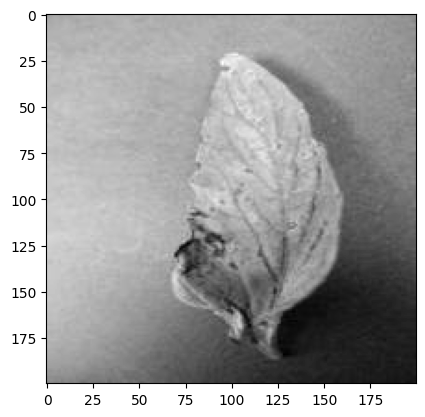

In [7]:
data,Label = shuffle(immatrix,label, random_state=2)
train_data = [data,Label]

img=immatrix[67].reshape(img_rows,img_cols)

plt.imshow(img)

plt.imshow(img,cmap='gray')

print (train_data)
print (train_data[0])
print (train_data[1])

**STEP 8**





In [8]:
(X, y) = (train_data[0], train_data[1])
print(X)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)


print('X_train :', X_train)
print('y_train:', y_train)
print('X_test:', X_test)
print('y_test:', y_test)


X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255


print('X_train shape:', X_train.shape)
print('y_train shape:', y_train, shape)
print('X_test shape:', X_test.shape)
print('y test shape:', y_test.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

[[158. 162. 163. ... 112. 115. 115.]
 [158. 159. 157. ... 108. 111. 114.]
 [111. 115. 114. ... 156. 155. 155.]
 ...
 [154. 152. 150. ... 120. 117. 115.]
 [ 81.  84.  86. ... 113. 114. 118.]
 [142. 130. 124. ...  95.  97. 100.]]
[3 1 2 1 0 1 0 1 1 0 3 3 3 0 0 1 0 1 3 3 1 0 3 2 3 0 1 3 3 3 3 0 0 2 1 3 0
 3 3 0 0 2 3 2 3 1 0 1 3 2 0 3 0 2 2 2 3 2 3 0 3 3 3 3 3 3 2 2 3 3 3 2 3 3
 3 2 1 1 2 2 0 3 1 1 1 1 3 2 3 3 2 1 0 3 3 2 1 3 0 2]
X_train : [[ 94.  91.  88. ... 137. 137. 137.]
 [148. 150. 152. ... 103. 106. 115.]
 [143. 143. 145. ...  29.  31.  33.]
 ...
 [123. 118. 113. ...  72.  71.  69.]
 [124. 125. 125. ... 123. 125. 125.]
 [127. 123. 122. ... 148. 151. 152.]]
y_train: [0 0 3 1 1 3 1 3 2 3 3 3 3 2 3 2 3 3 1 0 0 1 3 0 3 3 2 3 0 0 1 3 1 3 0 1 1
 3 3 1 3 3 2 2 1 3 0 0 1 3 2 1 3 2 2 3 1 3 2 0 3 3 1 0 3 3 3 0 2 2 0 3 0 0
 3 2 1 3 2 0]
X_test: [[149. 150. 152. ... 102.  99. 100.]
 [115. 124. 130. ... 155. 160. 164.]
 [120. 112. 115. ... 144. 149. 152.]
 ...
 [150. 150. 150. ... 111. 110. 11

**STEP 9**




y_train: [0 0 3 1 1 3 1 3 2 3 3 3 3 2 3 2 3 3 1 0 0 1 3 0 3 3 2 3 0 0 1 3 1 3 0 1 1
 3 3 1 3 3 2 2 1 3 0 0 1 3 2 1 3 2 2 3 1 3 2 0 3 3 1 0 3 3 3 0 2 2 0 3 0 0
 3 2 1 3 2 0]
y_test:  [1 3 1 0 3 3 2 3 2 1 2 2 2 1 0 3 0 3 3 2]
y_train: [[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [

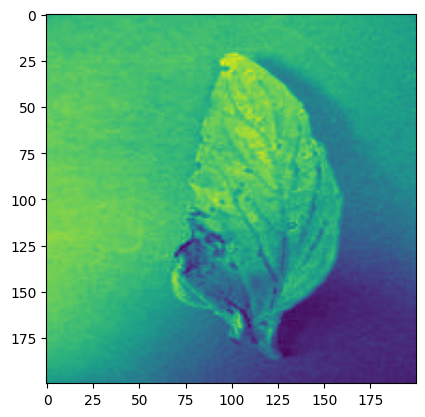

In [9]:
print("y_train:",y_train)
print("y_test: ",y_test)

nb_classes = 4

Y_train = utils.to_categorical(y_train, nb_classes)
Y_test = utils.to_categorical(y_test, nb_classes)

print("y_train:",Y_train)
print("y_test: ",Y_test)

i = 10

img=immatrix[67].reshape(img_rows,img_cols)
plt.imshow(img)

print("label of this image is: ", Y_train[i,:])

**STEP 10**



In [10]:
nb_filters = 32

nb_pool = 2

nb_conv = 3

batch_size = 32

nb_epoch = 20

model = Sequential()
model.add(Convolution2D(nb_filters, nb_conv, nb_conv, activation='relu', padding='valid', input_shape=(img_rows, img_cols, 1)))
model.add(Convolution2D(nb_filters, nb_conv, nb_conv, activation='relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout (0.5))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(optimizer=keras.optimizers.Adadelta(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**STEP 11.1**



In [11]:
batch_size = 32
nb_epoch = 20

hist = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
3/3 [==============================] - 3s 339ms/step - loss: 1.4033 - accuracy: 0.2000 - val_loss: 1.3901 - val_accuracy: 0.1500
Epoch 2/20
3/3 [==============================] - 0s 174ms/step - loss: 1.3837 - accuracy: 0.3125 - val_loss: 1.3901 - val_accuracy: 0.1500
Epoch 3/20
3/3 [==============================] - 0s 166ms/step - loss: 1.3907 - accuracy: 0.2500 - val_loss: 1.3900 - val_accuracy: 0.1500
Epoch 4/20
3/3 [==============================] - 0s 156ms/step - loss: 1.3898 - accuracy: 0.2875 - val_loss: 1.3900 - val_accuracy: 0.1500
Epoch 5/20
3/3 [==============================] - 0s 173ms/step - loss: 1.3993 - accuracy: 0.2375 - val_loss: 1.3900 - val_accuracy: 0.1500
Epoch 6/20
3/3 [==============================] - 0s 159ms/step - loss: 1.3917 - accuracy: 0.2250 - val_loss: 1.3900 - val_accuracy: 0.1500
Epoch 7/20
3/3 [==============================] - 0s 172ms/step - loss: 1.3896 - accuracy: 0.2125 - val_loss: 1.3900 - val_accuracy: 0.1500
Epoch 8/20
3/3 [====

**STEP 12.1**




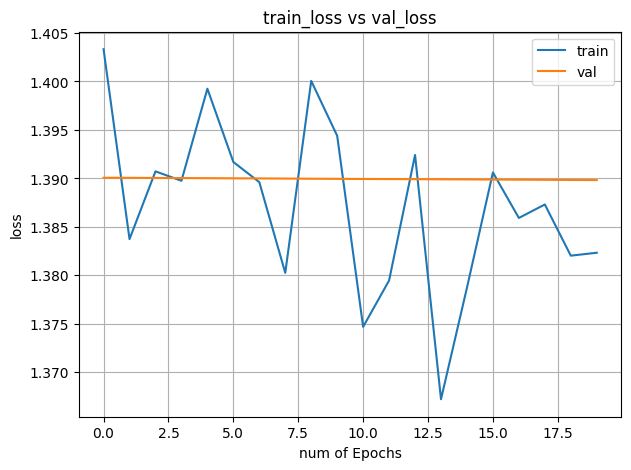

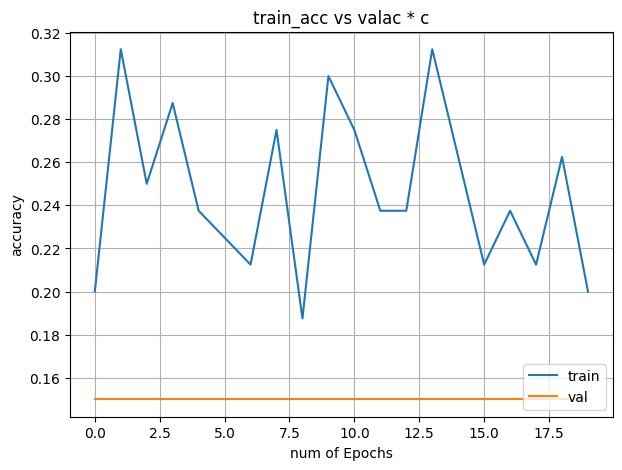

In [12]:
train_loss=hist.history['loss']

val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']

xc=range(nb_epoch)

plt.figure(1, figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train', 'val'])

plt.figure(2, figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs valac * c' )
plt.grid(True)
plt.legend(['train', 'val'], loc=4)

**STEP 11.2**




In [13]:
from sklearn.model_selection import StratifiedKFold

num_folds = 10
history_list = []
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

for fold, (train_index, val_index) in enumerate(skf.split(X, y)):
  print(f" Training on fold {fold + 1}/{num_folds}...")

X_fold_train, X_fold_val = X[train_index], X[val_index]
y_fold_train, y_fold_val = y[train_index], y[val_index]

X_fold_train = X_fold_train.reshape(X_fold_train.shape[0], img_rows, img_cols, 1)
X_fold_val = X_fold_val.reshape(X_fold_val.shape[0], img_rows, img_cols, 1)

model.compile(optimizer=keras.optimizers.Adadelta(learning_rate=0.0001),
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])

nb_classes = 4

y_train = utils.to_categorical(y_fold_train, nb_classes)
y_val = utils.to_categorical(y_fold_val, nb_classes)
history = model.fit(X_fold_train, y_train, batch_size-batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_fold_val, y_val))
history_list.append(history)

print("Training the final KFold model (KFmodel) using all data...")
model.fit(X.reshape(X.shape[0], img_rows, img_cols, 1), utils.to_categorical (y, nb_classes), batch_size=batch_size, epochs=nb_epoch, verbose=0)
print("Final KFold model (KFmodel) training complete!")

 Training on fold 1/10...
 Training on fold 2/10...
 Training on fold 3/10...
 Training on fold 4/10...
 Training on fold 5/10...
 Training on fold 6/10...
 Training on fold 7/10...
 Training on fold 8/10...
 Training on fold 9/10...
 Training on fold 10/10...
Epoch 1/20
3/3 [==============================] - 4s 959ms/step - loss: 32.5316 - accuracy: 0.2667 - val_loss: 18.9200 - val_accuracy: 0.2000
Epoch 2/20
3/3 [==============================] - 1s 180ms/step - loss: 32.4032 - accuracy: 0.2667 - val_loss: 18.8696 - val_accuracy: 0.2000
Epoch 3/20
3/3 [==============================] - 0s 159ms/step - loss: 24.9370 - accuracy: 0.2667 - val_loss: 18.8065 - val_accuracy: 0.2000
Epoch 4/20
3/3 [==============================] - 0s 162ms/step - loss: 37.0161 - accuracy: 0.1333 - val_loss: 18.7429 - val_accuracy: 0.2000
Epoch 5/20
3/3 [==============================] - 0s 159ms/step - loss: 36.5105 - accuracy: 0.3000 - val_loss: 18.6831 - val_accuracy: 0.2000
Epoch 6/20
3/3 [=============

**STEP 12.2**










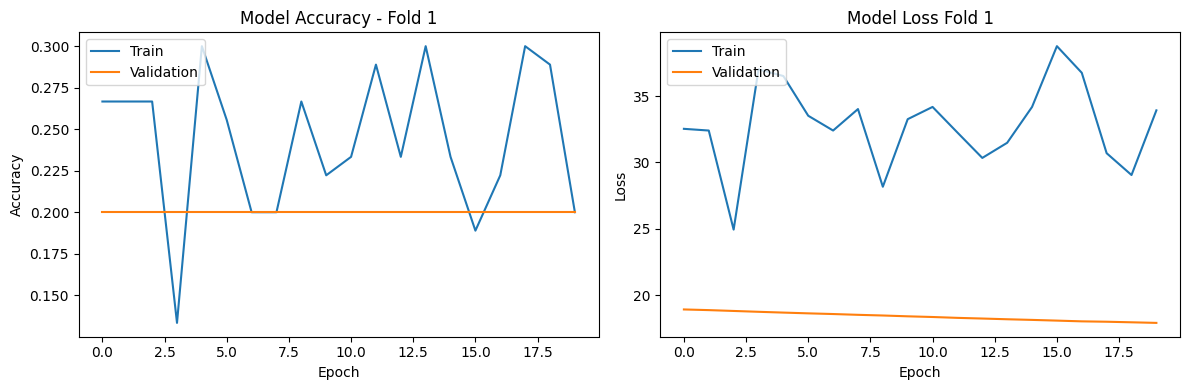



Average Training Accuracy Across Folds: 0.2000


Final Model is Successfully Set and Compiled


In [14]:
training_accuracies = []

for fold, history in enumerate(history_list):
  plt.figure(figsize=(12, 4))

  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title(f'Model Accuracy - Fold {fold + 1}')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train', 'Validation'], loc='upper left')

  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title(f'Model Loss Fold {fold + 1}')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train', 'Validation'], loc='upper left')

training_accuracies.append(history.history['accuracy'][-1])

plt.tight_layout()
plt.show()

average_training_accuracy = sum(training_accuracies) / len(training_accuracies)
print(f'\n{"="*40 }\n')
print(f'Average Training Accuracy Across Folds: {average_training_accuracy:.4f}')
print(f'\n{"="*40}\n')

for fold, history in enumerate (history_list):
  fold_weights = model.get_weights()

  if fold == 0:
    average_weights = fold_weights
  else:
    average_weights = [np.add(average_weights[i], fold_weights[i]) for i in range(len(average_weights))]


average_weights = [np.divide(weight, num_folds) for weight in average_weights]

final_model = Sequential()

final_model.add(Convolution2D(nb_filters, nb_conv, nb_conv, padding='valid', input_shape=(img_rows, img_cols,1)))
convout1 = Activation('relu')
final_model.add(convout1)
final_model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
convout2 = Activation('relu')
final_model.add(convout2)
final_model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
final_model.add(Dropout (0.5))
final_model.add(Flatten())
final_model.add(Dense(128))
final_model.add(Activation('relu'))
final_model.add(Dropout(0.5))
final_model.add(Dense(nb_classes))
final_model.add(Activation('softmax'))
final_model.set_weights(average_weights)
final_model.compile(optimizer=keras.optimizers.Adadelta(learning_rate=0.0001),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
#This line prints a message indicating that the final model has been set and compiled successfully.
print("Final Model is Successfully Set and Compiled")

**STEP 13.1**




In [15]:
score = model.evaluate(X_test, Y_test, verbose=0)

print(model.metrics_names)
print(score)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print(Y_test)
Y_pred = model.predict(X_test)
print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)
target_names = ['class (Comfort)', 'class 1(Discomfort)', 'class 2(Distressed)', 'class 2(Happy)']
print("Performance report for Hold-out method training: \n",classification_report(np.argmax(Y_test, axis=1), y_pred, target_names=target_names))
print("Confusion Matrix: \n",confusion_matrix(np.argmax(Y_test, axis=1), y_pred))

['loss', 'accuracy']
[1.38869309425354, 0.15000000596046448]
Test loss: 1.38869309425354
Test accuracy: 0.15000000596046448
[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]
1/1 [==============================] - 0s 130ms/step
[[0.26207486 0.24227415 0.24594131 0.24970964]
 [0.2648251  0.24518742 0.24171162 0.24827592]
 [0.26926553 0.23869981 0.24240243 0.24963214]
 [0.26486474 0.24028684 0.24453707 0.25031126]
 [0.2712296  0.23740363 0.24152364 0.24984321]
 [0.26976937 0.23596485 0.24034214 0.25392365]
 [0.26412982 0.23351383 0.2534826  0.24887371]
 [0.27151817 0.23357785 0.24827097 0.24663304]
 [0.2616801  0.24013634 0.24914065 0.24904281]
 [0.2673078  0.23884602 0.24388194 0.24996416]
 [0.26240447 0.24331349 0.24596702 0.248315  ]
 [0.2

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**STEP 13.2**



In [16]:
score = final_model.evaluate(X_test, Y_test, verbose=0)

print(final_model.metrics_names)
print(score)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print(Y_test)
Y_pred = final_model.predict(X_test)
print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)
target_names = ['class (Comfort)', 'class 1(Discomfort)', 'class 2(Distressed)', 'class 3(Happy)']
print("Performance report: \n",classification_report(np.argmax(Y_test, axis=1), y_pred,target_names=target_names))
print("Confusion Matrix: \n",confusion_matrix(np.argmax(Y_test, axis=1), y_pred))

['loss', 'accuracy']
[1.3862937688827515, 0.20000000298023224]
Test loss: 1.3862937688827515
Test accuracy: 0.20000000298023224
[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]
1/1 [==============================] - 1s 538ms/step
[[0.25000018 0.24999957 0.2499993  0.25000095]
 [0.25000045 0.24999985 0.2499989  0.2500008 ]
 [0.2500009  0.24999921 0.24999897 0.25000095]
 [0.25000048 0.24999937 0.24999917 0.250001  ]
 [0.2500011  0.24999909 0.24999891 0.25000098]
 [0.25000095 0.2499989  0.24999875 0.25000137]
 [0.2500004  0.24999867 0.2500001  0.2500009 ]
 [0.25000113 0.24999869 0.2499996  0.25000066]
 [0.25000018 0.24999933 0.24999964 0.25000086]
 [0.2500007  0.2499992  0.2499991  0.25000098]
 [0.25000024 0.24999966 0.2499993  0.2500008 ]
 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
